In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [546]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('Laborday')  

col = db.get_collection('ticket') # 连接到集合ticket
mon_data = col.find()  # 查询这个集合下的所有记录

In [547]:
data = json_normalize([rec for rec in mon_data])

In [548]:
data.to_csv('data.csv', index=False)

In [4]:
data.sample(5)

,_id,city,fields.cityName,fields.comment,fields.discountPrice,fields.distance,fields.features,fields.featuresNew,fields.fromName,fields.h5_url,...,fields.sold365,fields.soldRecent,fields.soldRecentNum,fields.subTitle,fields.tagList,fields.title,fields.titleTagInfos,fields.type,src,trip_main_busness_type
25873,5cc71a5f64eeab7d62a581a5,武汉,None,1403,214,None,"[{'key': None, 'text': '平均8分钟出票', 'color': Non...","[{'key': None, 'text': '平均8分钟出票', 'color': Non...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售1.1万+笔,月售315笔,303,None,[],【当天可订即买即用】武汉汉秀剧场演出门票D区万达汉秀C-B-A-VIP,[],None,mix,vocation
41256,5cc71b5064eeab7d62a5bdbc,成都,None,0,230,None,"[{'key': None, 'text': '最早可定明日票', 'color': Non...","[{'key': None, 'text': '最早可定明日票', 'color': Non...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,None,None,0,None,[],【官方授权】成都欢乐谷门票日场大门票成人票当天可定成都欢乐谷,[],None,mix,vocation
44048,5cc71b8464eeab7d62a5c8a4,丽江,None,0,323,None,"[{'key': None, 'text': '18:50前可订今日票', 'color':...","[{'key': None, 'text': '18:50前可订今日票', 'color':...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售3笔,月售1笔,1,None,[],【在线选座】丽江云南的响声门票 杨丽萍云南的响声演出门票,[],None,mix,vocation
18667,5cc719e164eeab7d62a5657f,泉州,None,0,34,None,"[{'key': None, 'text': '17:00前可订今日票', 'color':...","[{'key': None, 'text': '17:00前可订今日票', 'color':...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售2笔,月售2笔,2,None,[],X福建泉州南安香草世界门票 花都香草世界门票 泉州旅游景点门票A,[],None,mix,vocation
50456,5cc71bed64eeab7d62a5e1ac,上海,None,1838,361,None,"[{'key': None, 'text': '18:00前可订今日票', 'color':...","[{'key': None, 'text': '18:00前可订今日票', 'color':...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售1.5万+笔,月售4270笔,4273,None,[],上海迪士尼门票一日票 迪士尼门票上海双人 免费领快速通行证 FP,[],None,mix,vocation


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 31 columns):
_id                       54675 non-null object
city                      54675 non-null object
fields.cityName           0 non-null object
fields.comment            50187 non-null object
fields.discountPrice      54675 non-null object
fields.distance           0 non-null object
fields.features           54675 non-null object
fields.featuresNew        50187 non-null object
fields.fromName           0 non-null object
fields.h5_url             50187 non-null object
fields.itemId             54675 non-null object
fields.itemTotalScore     50187 non-null float64
fields.latitude           54675 non-null float64
fields.longitude          54675 non-null float64
fields.native_url         0 non-null object
fields.p_score            54675 non-null object
fields.pc_url             54675 non-null object
fields.picUrl             54675 non-null object
fields.price              54675 non-null

### 1. 清洗数据
#### 1.1 把需要的字段挑出来

In [6]:
data.columns

Index(['_id', 'city', 'fields.cityName', 'fields.comment',
       'fields.discountPrice', 'fields.distance', 'fields.features',
       'fields.featuresNew', 'fields.fromName', 'fields.h5_url',
       'fields.itemId', 'fields.itemTotalScore', 'fields.latitude',
       'fields.longitude', 'fields.native_url', 'fields.p_score',
       'fields.pc_url', 'fields.picUrl', 'fields.price', 'fields.scm',
       'fields.shortInfo', 'fields.sold365', 'fields.soldRecent',
       'fields.soldRecentNum', 'fields.subTitle', 'fields.tagList',
       'fields.title', 'fields.titleTagInfos', 'fields.type', 'src',
       'trip_main_busness_type'],
      dtype='object')

In [71]:
data.iloc[55]

_id                                                5cc718a064eeab7d62a51ccb
city                                                                    石家庄
fields.cityName                                                        None
fields.comment                                                            0
fields.discountPrice                                                  116.9
fields.distance                                                        None
fields.features           [{'key': None, 'text': '18:00前可订今日票', 'color':...
fields.featuresNew        [{'key': None, 'text': '18:00前可订今日票', 'color':...
fields.fromName                                                        None
fields.h5_url             https://h5.m.taobao.com/trip/travel-detail/ind...
fields.itemId                                                  588857206136
fields.itemTotalScore                                                     0
fields.latitude                                                           0
fields.longi

In [74]:
col_keep = ['city', 'fields.comment', 'fields.discountPrice', 'fields.features', 'fields.itemId',
           'fields.itemTotalScore', 'fields.latitude', 'fields.longitude', 'fields.price',
           'fields.shortInfo', 'fields.sold365', 'fields.soldRecentNum', 'fields.tagList', 
            'fields.title', 'trip_main_busness_type']
data = data[col_keep]

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 15 columns):
city                      54675 non-null object
fields.comment            50187 non-null object
fields.discountPrice      54675 non-null object
fields.features           54675 non-null object
fields.itemId             54675 non-null object
fields.itemTotalScore     50187 non-null float64
fields.latitude           54675 non-null float64
fields.longitude          54675 non-null float64
fields.price              54675 non-null object
fields.shortInfo          50187 non-null object
fields.sold365            32193 non-null object
fields.soldRecentNum      54675 non-null object
fields.tagList            54675 non-null object
fields.title              54675 non-null object
trip_main_busness_type    54675 non-null object
dtypes: float64(3), object(12)
memory usage: 6.3+ MB


In [76]:
data.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
48231,北京,255,22,"[{'key': None, 'text': '13:30前可订今日票', 'color':...",40271420829,5.0,0.0,0.0,22,北京,已售1636笔,41,[],【自动发码】北京汽车博物馆 北京汽车博物馆电子票,vocation
10301,杭州,6,78,"[{'key': None, 'text': '15:00前可订今日票', 'color':...",564944193109,4.6,0.0,0.0,78,杭州,已售58笔,0,[],浙江杭州东方文化园门票电子票含万佛金塔地宫+观音显圣+道苑天宫,vocation
53053,香港,571,567.5,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",559918262990,5.0,0.0,0.0,567.5,香港,已售5269笔,647,[],赠商品优惠券 香港迪士尼门票2日票 香港迪斯尼乐园官方保障,vocation
5545,盐城,9,85.5,"[{'key': None, 'text': '12:00前可订今日票', 'color':...",570386677874,4.8,0.0,0.0,85.5,盐城,已售144笔,0,[],当日可订|江苏盐城大丰港海洋世界成人门票海洋世界儿童门票,vocation
623,保定,0,65,"[{'key': None, 'text': '22:00前可订今日票', 'color':...",586810242474,0.0,0.0,0.0,65,保定,已售5笔,0,[],da wu 温泉度假村 大门票,vocation


1.2 去重

In [84]:
data.drop_duplicates(subset='fields.itemId', inplace=True)

#### 1.3 数据类型转换

In [102]:
# 由于np.nan是float，所以这里整体转换为float
data.loc[data['fields.comment'].isnull(), 'fields.comment'] = np.nan
data['fields.comment'] = data['fields.comment'].astype(float)

In [106]:
data['fields.discountPrice'] = data['fields.discountPrice'].astype(float)
data['fields.itemId'] = data['fields.itemId'].astype(int)
data['fields.price'] = data['fields.price'].astype(float)
data['fields.soldRecentNum'] = data['fields.soldRecentNum'].astype(int)

#### 1.4 各字段清洗
- fields.features
- fields.sold365
- fields.tagList

In [129]:
data.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
44352,昭通,0.0,125.0,"[{'key': None, 'text': '21:00前可订今日票', 'color':...",588131795444,0.0,0.0000,0.000,125.0,昭通,None,0,[],【提前1小时预订】昭通西部大峡谷温泉门票+盐疗票+汗蒸票+鱼疗票,vocation
22987,日照,2.0,180.0,"[{'key': None, 'text': '15:00前可订今日票', 'color':...",574386609814,5.0,0.0000,0.000,180.0,日照,已售12笔,0,[],【官方通票 即买即用】山东日照海洋公园门票,vocation
52800,重庆,0.0,28.0,"[{'key': None, 'text': '17:30前可订今日票', 'color':...",592668151775,0.0,0.0000,0.000,28.0,重庆,None,0,[],垫江乐天花谷hss000kk,vocation
8879,江阴,NaN,105.0,"[{'key': '一句话描述', 'text': '登上金塔可以纵览华西村美景，那尊超级金...",19644,NaN,31.8222,120.439,105.0,None,None,45,"[{'text': '4A景区', 'icon': None, 'borderColor':...",华西村,scenic
21353,青岛,328.0,280.0,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",42341468949,4.7,0.0000,0.000,280.0,青岛,已售4024笔,92,[],【方特官方门票】青岛方特梦幻王国门票 身份证入园极速出票,vocation


In [131]:
# fields.features清洗
def get_fea_text(data):
    if len(data) > 0:
        return data[0]['text']
    else:
        return None


data['fields.features'] = data['fields.features'].apply(get_fea_text)

In [205]:
data['fields.sold365'].sample(5)

47279     已售1228笔
30354    已售1.2万+笔
33668        已售3笔
4790      已售1334笔
36201        已售8笔
Name: fields.sold365, dtype: object

In [211]:
# fields.sold365清洗
def get_sold365(data):
    if data is None:
        return np.nan
    if "万" in data:
        return float(data[data.find('售')+1:data.find('万')]) * 10000
    else:
        return float(data[data.find('售')+1:data.find('笔')])

    
data['fields.sold365'] = data['fields.sold365'].apply(get_sold365)

In [229]:
data['fields.tagList'].sample(5)

47667                                                   []
23081                                                   []
2395                                                    []
23734    [{'text': 'AAA', 'icon': None, 'borderColor': ...
18676                                                   []
Name: fields.tagList, dtype: object

In [230]:
# fields.tagList清洗
data['fields.tagList'] = data['fields.tagList'].apply(get_fea_text)

#### 1.5 跟省份数据merge在一起

In [242]:
city_data = pd.read_csv('city_data.csv')

In [243]:
city_data.head()

,city,province
0,石家庄,河北省
1,邯郸,河北省
2,唐山,河北省
3,保定,河北省
4,秦皇岛,河北省


In [244]:
data_final = data.merge(city_data, on='city')

In [257]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province
48253,澳门,2.0,95.0,20:00前可订今日票,543230350208,5.0,0.0,0.0,100.00,澳门,22.0,0,None,澳门观光塔门票旅游塔门票澳门旅游澳门景点门票澳门塔门票,vocation,澳门
14801,厦门,13.0,348.0,平均1分钟出票,544042938836,5.0,0.0,0.0,348.00,厦门,171.0,9,None,【温泉门票+SPA（二选一）+鱼疗】厦门旅游 日月谷温泉 景点门票,vocation,福建省
3509,长春,0.0,98.0,16:53前可订今日票,581974218403,0.0,0.0,0.0,98.00,长春,3.0,0,None,C【即买即用】长春 关东文化园门票 关东文化园温泉票,vocation,吉林省
45283,上海,0.0,22.6,14:30前可订今日票,590474254915,0.0,0.0,0.0,22.60,上海,NaN,0,None,上海 滨海森林公园 大门票 滨海旅游 度假区 成人票学生票老人票,vocation,上海市
45002,上海,0.0,118.8,08:30前可订今日票,588030049902,0.0,0.0,0.0,118.81,上海,8.0,5,None,【快速出票 刷身份证】上海野生动物园门票上海野生动物成人票,vocation,上海市


In [256]:
data_final.to_csv('data_clean.csv', index=False)

In [542]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48537 entries, 0 to 48536
Data columns (total 17 columns):
city                      48537 non-null object
fields.comment            44643 non-null float64
fields.discountPrice      48537 non-null float64
fields.features           48332 non-null object
fields.itemId             48537 non-null int64
fields.itemTotalScore     44643 non-null float64
fields.latitude           48537 non-null float64
fields.longitude          48537 non-null float64
fields.price              48537 non-null float64
fields.shortInfo          44643 non-null object
fields.sold365            28057 non-null float64
fields.soldRecentNum      48537 non-null int64
fields.tagList            1743 non-null object
fields.title              48537 non-null object
trip_main_busness_type    48537 non-null object
province                  48537 non-null object
discount                  48537 non-null float64
dtypes: float64(8), int64(2), object(7)
memory usage: 7.9+ MB


### 问题
1. 哪些城市/省份的旅游选择最多？
2. 哪些城市最受游客青睐？
3. 最热门的景点
4. 各省份的好评热门景点
5. 很热门但是评分不好的景点
6. 打折力度最大的景点
7. 各级别景区的门票价格

#### 1. 哪些城市/省份的旅游选择最多？

In [259]:
count_top12 = data_final['fields.shortInfo'].value_counts()[:12]

In [280]:
from pyecharts import Funnel

funnel = Funnel("旅游选择最多的前12个城市", width = 800,height=600)
funnel.add("", count_top12.index, count_top12.values, legend_top=30,
           xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
          )
funnel

In [287]:
count_province_top10 = data_final['province'].value_counts()

In [297]:
count_province_top10

广东省         4943
浙江省         4688
海南省         3907
江苏省         3889
山东省         2853
福建省         2818
广西壮族自治区     2391
湖北省         2106
北京市         1658
安徽省         1610
四川省         1548
云南省         1541
辽宁省         1480
河北省         1403
上海市         1358
河南省         1313
江西省         1255
陕西省         1104
重庆市          955
香港           923
湖南省          778
澳门           644
黑龙江省         604
甘肃省          467
天津市          430
贵州省          368
山西省          364
宁夏回族自治区      305
吉林省          271
内蒙古自治区       151
台湾           142
西藏自治区        141
新疆维吾尔自治区      90
青海省           39
Name: province, dtype: int64

In [294]:
province = [pro.replace("省", "") for pro in list(count_province_top10.index)]
province = [pro.replace("市", "") for pro in province]

In [302]:
province = ['广东','浙江','海南','江苏','山东','福建','广西','湖北','北京','安徽','四川','云南',
            '辽宁','河北','上海','河南','江西','陕西','重庆','香港','湖南','澳门','黑龙江','甘肃',
            '天津','贵州','山西','宁夏','吉林','内蒙古','台湾','西藏',
            '新疆','青海']

In [541]:
from pyecharts import Map


map = Map("全国各省份旅游选择数量图", width=600, height=600)
map.add(
    "",
    province,
    count_province_top10.values,
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0, 5000]
)
map

#### 2. 哪些城市最受游客青睐？

In [354]:
city_sale_top10 = data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

In [356]:
from pyecharts import Bar

bar = Bar("最近一个月售出门票Top10城市", width = 700,height=500)
bar.add("", city_sale_top10.index, city_sale_top10.values, is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=20)
bar

In [ ]:
data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

In [347]:
city_favor_count = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].count()

In [349]:
city_qual = list(city_favor_count[city_favor_count > 30].index)

In [366]:
city_favor_top10 = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)&
                              (data_final['fields.shortInfo'].isin(city_qual))
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].mean().nlargest(20)

In [369]:
from pyecharts import WordCloud


name, value = city_favor_top10.index, city_favor_top10.values*10-30
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud

#### 3. 最热门的景点

In [516]:
data_final.sort_values(by='fields.soldRecentNum', 
                      ascending=False)[:12][['fields.title', 'fields.soldRecentNum']]

,fields.title,fields.soldRecentNum
44567,上海迪士尼度假区,227123
8162,灵隐飞来峰,119349
8285,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729
46880,香港迪士尼乐园,75092
42479,故宫博物院,50138
25585,广州长隆野生动物世界,41234
29091,珠海长隆海洋王国,34822
14184,九华山,29984
44571,上海野生动物园,25642
25587,广州长隆国际大马戏,25421


In [524]:
most_popular = ['灵隐飞来峰', '上海迪士尼', '香港迪士尼', '广州长隆', '故宫博物院',
               '珠海长隆', '九华山', '上海野生动物园', '东方明珠', '乌镇']
most_popular_values = [119349+117729, 227123, 75092, 41234+25421, 50138,
                      34822, 29984, 25642, 24243, 19557]

bar = Bar("最热门的10个景点", width = 700,height=600)
bar.add("", most_popular, most_popular_values, is_stack=True, 
       xaxis_label_textsize=16, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=25)
bar

#### 4. 各省份的好评热门景点

In [371]:
data.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
15648,黄山,1.0,78.0,17:00前可订今日票,543240295472,5.0,0.0,0.0,78.0,黄山,45.0,0,None,【免预约 随订随进】黄山齐云山自由家营地景区门票 体验票游玩票,vocation
710,秦皇岛,51.0,19.5,16:00前可订今日票,39243817566,5.0,0.0,0.0,19.5,秦皇岛,2139.0,21,None,山海关老龙头门票秦皇岛旅游景区官方折扣电子票自动发码,vocation


In [421]:
def get_top1(data):
    return data.head(1)

In [438]:
province_top1 = data_final.sort_values(by=['province', 'fields.itemTotalScore', 'fields.soldRecentNum'], 
                      ascending=False).groupby('province').apply(get_top1)[['fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']].reset_index()
province_top1.drop(columns = 'level_1', inplace=True)
province_top1.rename(columns={'province':'省份', 'fields.title':'项目名', 
                             'fields.soldRecentNum':'销售数量', 'fields.itemTotalScore':'评分'}, 
                    inplace=True)
province_top1

,省份,项目名,销售数量,评分
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
1,云南省,昆明青鱼湾水上乐园门票 青鱼湾【现买现用·秒出票】一票通玩,543,5.0
2,内蒙古自治区,【超值体验】内蒙古旅游鄂尔多斯草原演绎套票,16,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
4,台湾,雄狮旅游 台湾台北国立故宫博物院门票二维码电子票儿童免票,123,5.0
5,吉林省,I【自动出票】吉林长春伪满皇宫博物院门票 博物馆门票,125,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
7,天津市,【官方门票】天津方特欢乐世界门票 刷身份证入园,481,5.0
8,宁夏回族自治区,l【当天可订】 宁夏银川镇北堡西部影视城大门票 华夏西部影城,351,5.0
9,安徽省,【当天可订】宏村门票 安徽黄山宏村优惠票 宏村团队 黄山旅游,3070,5.0


In [525]:
province_top1.sort_values(by='销售数量', ascending=False)

,省份,项目名,销售数量,评分
19,浙江省,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729,5.0
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
15,江苏省,【当天可订|自动出票】南京总统府景区门票南京总统府门票电子票,6924,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
30,陕西省,西安旅游 西安兵马俑博物馆门票 兵马俑门票兵马俑大门票秦始皇陵,5307,5.0
25,福建省,【官方旗舰店】菽庄花园门票成人票 厦门鼓浪屿景区景点门票飞猪,4576,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
20,海南省,免抱佛脚随时出票三亚南山寺门票+电瓶车南海观音南山海南旅游,4080,5.0
28,辽宁省,【四馆套票】辽宁大连圣亚海洋世界公园极地馆旅游景区景点门票,4049,5.0
10,山东省,【免取票电子票】山东德州济南泉城海洋极地世界旅游景区景点门票,3613,5.0


#### 5. 热门但是评分不太高的景点

In [452]:
data_final[(data_final['fields.soldRecentNum']>100)&
          (data_final['fields.itemTotalScore']<4.5)&
          (data_final['fields.itemTotalScore']>0)][['fields.shortInfo', 'fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']]

,fields.shortInfo,fields.title,fields.soldRecentNum,fields.itemTotalScore
2545,大连,【领券立减】大连二〇三樱花园大门票旅顺203樱花成人票扫码入园,118,4.3
7124,无锡,【当天可定】无锡善卷洞门票善卷洞含游船联票大门票成人电子票,760,4.2
8317,杭州,浙江杭州临安风之谷景区门票 户外昌化风之谷门票 杭州接送跟车,199,4.3
22782,武汉,【汉口粤汉码头登船】武汉两江游览船票B线（不含餐）夜游长江游,109,4.3
26939,深圳,ZY【当天可定即定即用】深圳观澜山水田园娱乐套票A 含景区大门票,155,3.8
29856,佛山,顺德长鹿农庄门票 休博园 大门票+游乐金+动物园 单人票/双人票,1001,4.4
29877,佛山,长鹿农庄门票休博园大门票 套票动物园2大2小（不含矿洞海洋馆）,210,4.3
40353,西安,陕西 西安 西安城墙景区 大门票+电子导览,221,4.4
42576,北京,北京昌平第七届北京农业嘉年华大门票 农业嘉年华门票 成人票,112,4.4
46919,香港,Dm香港迪士尼乐园门票1日迪斯尼香港旅游自由行景点电子票不刷单,261,4.3


#### 6. 打折力度最大的景点

In [453]:
data.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
30023,广州,1.0,88.0,18:00前可订今日票,43133513613,5.0,0.0,0.0,88.0,广州,77.0,0,None,广州珠江夜游中恒集团号 二楼VIP座 门票船票/大沙头码头,vocation
52777,重庆,0.0,111.0,最早可定明日票,592703467097,0.0,0.0,0.0,111.0,重庆,NaN,0,None,重庆武隆喀斯特/龙水峡地缝票/含仙女镇武隆游客中心往返的中转车,vocation


In [477]:
data_final['discount'] = np.round((1 - (data_final['fields.price'] - 
                               data_final['fields.discountPrice'])/data_final['fields.price'])*10, 1)

In [486]:
dis_data = data_final.sort_values(by='discount')[['fields.discountPrice',
                                                            'fields.price',
                                                            'discount',
                                                            'fields.title',
                                                            'fields.shortInfo']]

In [487]:
dis_data.head(15)

,fields.discountPrice,fields.price,discount,fields.title,fields.shortInfo
28979,13.5,50.00,2.7,ZM【当天可定】广东 东莞南社明清古村落 成人儿童老人观光大门票,东莞
22713,180.0,630.00,2.9,【大学生3人特惠】武汉海昌极地海洋公园门票 海洋世界含萌宠乐园,武汉
29456,598.0,1980.00,3.0,【598元/10次卡】超值钜惠 珠海海泉湾海洋温泉10次卡 可4人使用,珠海
37355,18.0,53.10,3.4,【双人特价 电子票】成都大熊猫基地门票成都大熊猫繁育研究基地,成都
27530,34.5,100.00,3.4,ZY【提前1小时下单】广东 清远田野绿世界 成人儿童老人大门票,清远
30308,36.0,100.00,3.6,ZM【当天可定】广东 阳江闸坡大角湾景区 成人1日景区大门票,阳江
26931,60.0,166.50,3.6,即买即用 索道+缆车】 深圳东部华侨城大侠谷门票 大峡谷亲子家庭,深圳
1004,49.9,135.00,3.7,当日可订 河北 秦皇岛 沙雕海洋乐园门票 沙雕大世界大门票,秦皇岛
30549,20.0,52.99,3.8,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁
30541,21.4,55.00,3.9,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁


In [545]:
dis_data[dis_data['discount']<7].to_csv('discount.csv', index=False)

(0, 150)

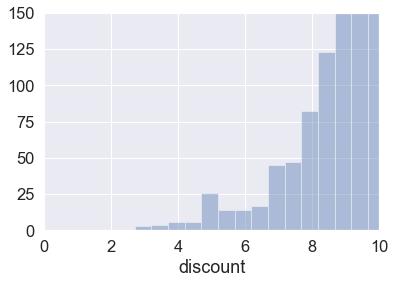

In [540]:
sns.set(font_scale=1.5)
g = sns.distplot(dis_data['discount'], kde=False)
g.set_xlim(0, 10)
g.set_ylim(0, 150)

In [493]:
dis_data[dis_data['discount']<7].groupby('fields.shortInfo')['fields.title'].count().nlargest(5)

fields.shortInfo
桂林    16
上海    12
香港    10
三亚     7
深圳     6
Name: fields.title, dtype: int64

#### 7. 各级别景区的门票价格

In [495]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province,discount
47863,澳门,43.0,81.0,平均2分钟出票,581212914850,5.0,0.0,0.0,81.0,澳门,347.0,47,None,即订即用●澳门威尼斯人酒店贡多拉船船票 威尼斯人贡多拉游船票,vocation,澳门,10.0
46474,重庆,0.0,92.0,15:00前可订今日票,588002298859,0.0,0.0,0.0,92.0,重庆,NaN,0,None,蘑菇总动员入园游览票+蘑菇房VR体验2项成人套票（及时入园）,vocation,重庆市,10.0
41253,宝鸡,0.0,288.0,14:00前可订今日票,592644497614,0.0,0.0,0.0,288.0,宝鸡,NaN,0,None,宝鸡太白山国家森林公园门票+太白山尚境温泉门票 西安旅游门票,vocation,陕西省,10.0
4947,徐州,0.0,66.0,16:30前可订今日票,591338865284,0.0,0.0,0.0,66.0,徐州,NaN,0,None,徐州新沂窑湾古镇门票 窑湾古镇成人票电子票,vocation,江苏省,10.0
4514,南京,411.0,122.0,15:50前可订今日票,564373921904,4.8,0.0,0.0,122.0,南京,2327.0,2,None,【当天可订立即出票】南京弘阳未来世界门票弘阳欢乐世界游乐场,vocation,江苏省,10.0


In [500]:
level = ['A', 'AA', 'AAA', '4A景区', '5A景区']
level_data = data_final.groupby('fields.tagList')['fields.price'].mean()[level]

In [504]:
data_final.groupby('fields.tagList')['fields.price'].mean()

fields.tagList
4A景区     79.781033
5A景区    121.984286
A        72.377778
AA       71.005000
AAA      53.908148
今日可用    162.322308
山        95.000000
明日可用    158.617455
景点      142.800000
演出      276.666667
赛事      150.000000
Name: fields.price, dtype: float64

In [502]:
level_data

fields.tagList
A        72.377778
AA       71.005000
AAA      53.908148
4A景区     79.781033
5A景区    121.984286
Name: fields.price, dtype: float64

In [508]:
bar = Bar("各级别景区的门票价格", width = 500,height=500)
bar.add("", level_data.index, np.round(level_data.values,0), is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True)
bar